# Exercise 10: K-means and Hierarchical Clustering

**Objective**:  
In this exercise, we explore unsupervised learning techniques to identify patterns in data without any labels. The focus is on two widely used clustering methods:
1. **K-means Clustering**: An iterative method that assigns each data point to a predefined number of clusters based on proximity to cluster centers.
2. **Hierarchical Clustering**: A method that builds a tree-like structure of clusters, known as a dendrogram, and groups data based on their similarity.

**Key Concepts**:
- **Distance Metrics**: Metrics like Euclidean distance play a significant role in determining how points are grouped.
- **Cluster Validity Measures**: Evaluate the quality of clusters using metrics like Rand Statistic, Jaccard Coefficient, and Normalized Mutual Information (NMI).
- **Applications**: Clustering methods can be used for data compression, pattern discovery, and understanding data structure.

**Sections**:
1. **10.1 K-means Clustering**: Explore how K-means groups data based on proximity, analyze the effects of different initializations, and determine the best number of clusters using validity measures.
2. **10.2 Hierarchical Clustering**: Create hierarchical cluster trees, interpret dendrograms, and explore the impact of different linkage methods.
3. **10.3 Old Faithful Geyser Data**: Apply clustering methods on real-world data and discuss how normalization affects results.

### Section 10.1: K-means Clustering

In this section, we implement **K-means clustering** to partition data into a predefined number of clusters based on proximity to cluster centers. We’ll examine the importance of initialization and use cluster validity measures to evaluate the quality of clustering.

#### Goals:
- Explore how different initializations affect the final clusters.
- Use metrics such as **within-cluster scatter** and **cluster validity** to determine the optimal number of clusters.

---

### Exercise 10.1.1: Applying K-means Clustering with Random Initialization

**Task Description**:  
In this task, we apply the K-means algorithm to a dataset using random initialization. The steps include:

1. **Data Loading**: Load the dataset and set up the parameters for K-means.
2. **Random Initialization**: Initialize the K-means algorithm with random cluster centroids.
3. **Clustering Execution**: Run K-means and observe the impact of different initializations on cluster formation.

This exercise will demonstrate how initialization affects the final clustering results. 

Let me know if you have the code to proceed or need help with implementation!

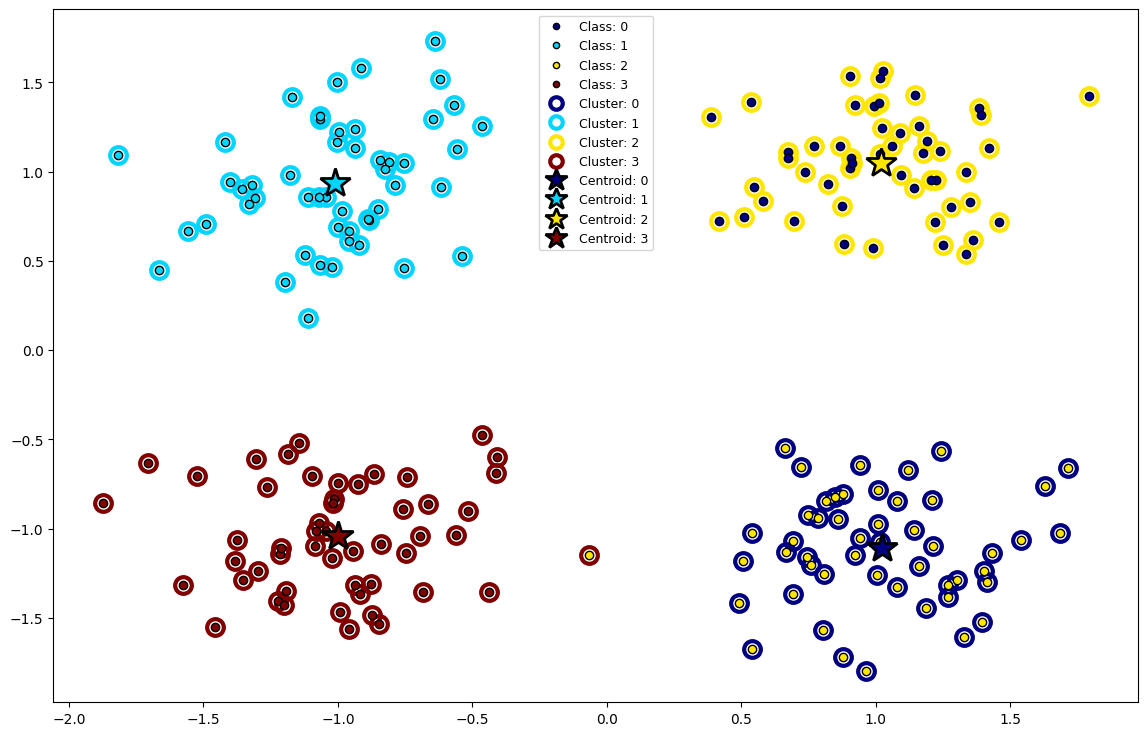

Ran Exercise 10.1.1


In [8]:
# exercise 10.1.1
import importlib_resources
from matplotlib.pyplot import figure, show
from scipy.io import loadmat
from sklearn.cluster import k_means

from dtuimldmtools import clusterplot

filename = importlib_resources.files("dtuimldmtools").joinpath("data/synth1.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"].squeeze()]
classNames = [name[0][0] for name in mat_data["classNames"]]
N, M = X.shape
C = len(classNames)

# Number of clusters:
K = 4

# K-means clustering:
centroids, cls, inertia = k_means(X, K)

# Plot results:
figure(figsize=(14, 9))
clusterplot(X, cls, centroids, y)
show()

print("Ran Exercise 10.1.1")


### Exercise 10.1.2: Evaluating Cluster Quality with Validity Measures

**Objective**:  
In this exercise, we examine whether using the **classification error rate** is a reasonable way to evaluate clustering quality, especially when the number of clusters differs from the number of true classes. Instead, we introduce **alternative cluster validity measures** that do not rely on class labels:

- **Rand Statistic**: Measures similarity between two clusterings by considering all pairs of samples and counting pairs that are either assigned to the same or different clusters in both clusterings.
- **Jaccard Coefficient**: Calculates the similarity between two clusterings based on the ratio of shared pairs to all pairs.
- **Normalized Mutual Information (NMI)**: Quantifies the amount of shared information between two clusterings, providing a more robust measure when class labels are absent.

**Goal**:  
Understand how each measure assesses clustering quality and helps select the optimal number of clusters for data without directly comparing to class labels.

---

### Solution

**Implementation**:  
1. Compute the **Rand Statistic**, **Jaccard Coefficient**, and **NMI** for various cluster configurations.
2. Analyze the results and discuss how each measure provides insights into clustering performance.

These metrics offer a more nuanced approach to evaluating clustering quality, especially when class labels may not align with the cluster count.


---

### Exercise 10.1.3: Optimal Number of Clusters

**Objective**:  
In this task, we determine the optimal number of clusters for the given dataset by evaluating different cluster counts. The steps are:

1. **Cluster Initialization**: Run K-means clustering with varying numbers of clusters.
2. **Evaluate Cluster Quality**: Use validity measures such as the within-cluster sum of squares to assess clustering quality for each cluster count.
3. **Determine Optimal Clusters**: Identify the number of clusters that best balance compactness within clusters and separation between clusters.

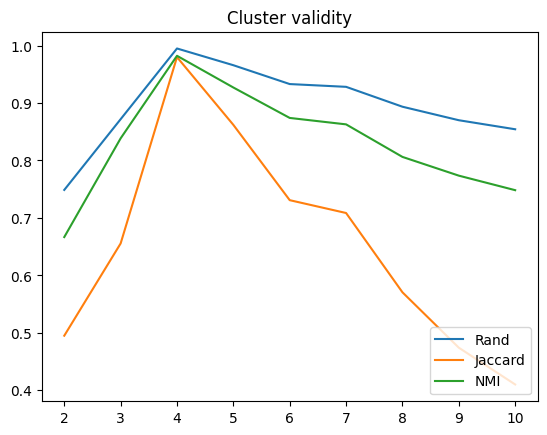

Ran Exercise 10.1.3


In [9]:
# exercise 10.1.3
import importlib_resources
import numpy as np
from matplotlib.pyplot import figure, legend, plot, show, title, ylim
from scipy.io import loadmat
from sklearn.cluster import k_means

from dtuimldmtools import clusterval

filename = importlib_resources.files("dtuimldmtools").joinpath("data/synth1.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

# Maximum number of clusters:
K = 10

# Allocate variables:
Rand = np.zeros((K-1,))
Jaccard = np.zeros((K-1,))
NMI = np.zeros((K-1,))

for k in range(K-1):
    # run K-means clustering:
    #cls = Pycluster.kcluster(X,k+1)[0]
    centroids, cls, inertia = k_means(X,k+2)
    # compute cluster validities:
    Rand[k], Jaccard[k], NMI[k] = clusterval(y,cls)    
        
# Plot results:

figure(1)
title('Cluster validity')
plot(np.arange(K-1)+2, Rand)
plot(np.arange(K-1)+2, Jaccard)
plot(np.arange(K-1)+2, NMI)
legend(['Rand', 'Jaccard', 'NMI'], loc=4)
show()

print('Ran Exercise 10.1.3')


### Exercise 10.1.4 - Evaluating K-means Clustering with Training and Test Sets

In supervised learning, cross-validation is used to evaluate model performance and determine the optimal number of parameters, like the number of clusters in K-means clustering. This exercise involves a similar approach by splitting the data into a training set to fit the K-means model and a test set to evaluate it. The evaluation is done by summing the distances of test points to their nearest cluster center, derived from the training set.

**Objective:** 
Observe the changes in training and test errors as the number of clusters increases.

**Key Insight:** 
By increasing the number of clusters, we can expect the training error to decrease as clusters fit more closely to data points. However, the test error may show a different trend, helping to identify an optimal number of clusters where the model generalizes best without overfitting.

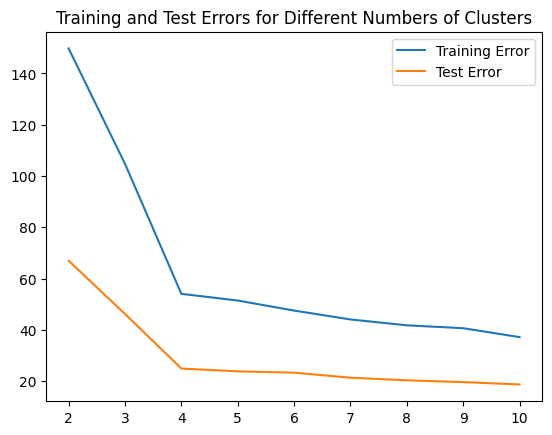

In [12]:
from sklearn.model_selection import train_test_split

# Set maximum number of clusters
K = 10

# Initialize arrays to store errors
train_errors = np.zeros(K-1)
test_errors = np.zeros(K-1)

# Split data into train and test sets
X_train, X_test = train_test_split(X, test_size=0.3, random_state=0)

for k in range(1, K):
    # Run K-means clustering on training data
    centroids, cls_train, inertia = k_means(X_train, n_clusters=k+1, random_state=0)
    
    # Calculate training error
    train_errors[k-1] = np.sum(np.min(np.linalg.norm(X_train[:, np.newaxis] - centroids, axis=2), axis=1))

    # Calculate test error by assigning test points to nearest centroids from training set
    test_errors[k-1] = np.sum(np.min(np.linalg.norm(X_test[:, np.newaxis] - centroids, axis=2), axis=1))

# Plot training and test errors for different numbers of clusters
figure()
plot(range(2, K+1), train_errors, label='Training Error')
plot(range(2, K+1), test_errors, label='Test Error')
title('Training and Test Errors for Different Numbers of Clusters')
legend()
show()

-> training and test error decreases with increasing clusters, as deviation between cluster points is reduced

### Exercise 10.1.5: Comparison of K-means and True Class Labels

**Objective**:  
In this task, we will compare the clusters generated by K-means with the true class labels of the dataset. This comparison will help evaluate the clustering accuracy and determine how well K-means approximates the true class structure.

**Steps**:
1. Apply K-means clustering with a specified number of clusters (matching the number of true classes).
2. Compare the resulting clusters with the actual class labels using metrics such as Rand Index, Jaccard Coefficient, or Normalized Mutual Information (NMI).

This task will provide insights into how closely unsupervised clustering aligns with the labeled data and its effectiveness in identifying natural groupings.

Initialization complete
Iteration 0, inertia 192978.67518567434.
Iteration 1, inertia 137665.39029480578.
Iteration 2, inertia 134751.94385202188.
Iteration 3, inertia 133873.09169145796.
Iteration 4, inertia 133483.3428421322.
Iteration 5, inertia 133206.63684024554.
Iteration 6, inertia 132951.1694857551.
Iteration 7, inertia 132832.87360364202.
Iteration 8, inertia 132766.59346871928.
Iteration 9, inertia 132715.32005364497.
Iteration 10, inertia 132696.92536378035.
Converged at iteration 10: strict convergence.


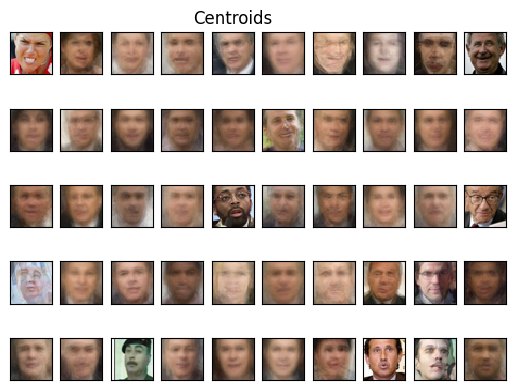

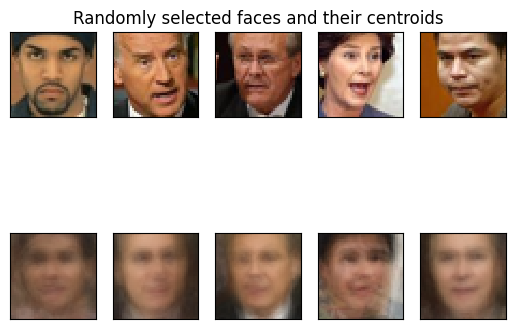

Ran Exercise 10.1.5


In [17]:
# exercise 10_1_5
import importlib_resources
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.cluster import k_means

filename = importlib_resources.files("dtuimldmtools").joinpath("data/wildfaces.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)

#filename = importlib_resources.files("dtuimldmtools").joinpath("data/digits.mat") #<-- uncomment this for using the digits dataset 
#mat_data = loadmat('../Data/digits.mat') #<-- uncomment this for using the digits dataset 

X = mat_data['X']
N, M = X.shape
# Image resolution and number of colors
x = 40 #<-- change this for using the digits dataset
y = 40 #<-- change this for using the digits dataset
c = 3 #<-- change this for using the digits dataset


# Number of clusters:
K = 50

# Number of repetitions with different initial centroid seeds
S = 1

# Run k-means clustering:
centroids, cls, inertia = k_means(X, K, verbose=True, max_iter=100, n_init=S)


# Plot results:

# Plot centroids
plt.figure(1)
n1 = int(np.ceil(np.sqrt(K/2)))
n2 = int(np.ceil(float(K)/n1))

#For black and white, cmap=plt.cm.binary, else default
cmap = plt.cm.binary if c==1 else None 

for k in range(K):
    plt.subplot(n1,n2,k+1)
    # Reshape centroids to fit resolution and colors
    img = np.reshape(centroids[k,:],(c,x,y)).T
    if c == 1: # if color is single-color/gray scale
        # Squeeze out singleton dimension
        # and flip the image (cancel out previos transpose)
        img = np.squeeze(img).T
    plt.imshow(img,interpolation='None', cmap=cmap)
    plt.xticks([]); plt.yticks([])
    if k==np.floor((n2-1)/2): plt.title('Centroids')

# Plot few randomly selected faces and their nearest centroids    
L = 5       # number of images to plot
j = np.random.randint(0, N, L)
plt.figure(2)
for l in range(L):
    plt.subplot(2,L,l+1)
    img = np.resize(X[j[l],:],(c,x,y)).T
    if c == 1:
        img = np.squeeze(img).T
    plt.imshow(img,interpolation='None', cmap=cmap)
    plt.xticks([]); plt.yticks([])
    if l==np.floor((L-1)/2): plt.title('Randomly selected faces and their centroids')
    plt.subplot(2,L,L+l+1)
    img = np.resize(centroids[cls[j[l]],:],(c,x,y)).T
    if c == 1:
        img = np.squeeze(img).T
    plt.imshow(img,interpolation='None', cmap=cmap)
    plt.xticks([]); plt.yticks([])

plt.show()

print('Ran Exercise 10.1.5')


lot about the orientation of the face

### Exercise 10.1.6: Digits data set

Initialization complete
Iteration 0, inertia 1165948.100846.
Iteration 1, inertia 757141.0129943741.
Iteration 2, inertia 741065.9382748604.
Iteration 3, inertia 734226.0032222741.
Iteration 4, inertia 729732.8312356321.
Iteration 5, inertia 725287.8404355876.
Iteration 6, inertia 722479.2415814013.
Iteration 7, inertia 721224.1422580873.
Iteration 8, inertia 720765.2959726849.
Iteration 9, inertia 720526.2493156083.
Iteration 10, inertia 720434.3140492241.
Iteration 11, inertia 720404.3404211975.
Iteration 12, inertia 720379.664195251.
Iteration 13, inertia 720367.5705455362.
Iteration 14, inertia 720362.0286711843.
Iteration 15, inertia 720361.1459066577.
Iteration 16, inertia 720359.9096778871.
Iteration 17, inertia 720359.0055766315.
Iteration 18, inertia 720358.7994890389.
Converged at iteration 18: strict convergence.


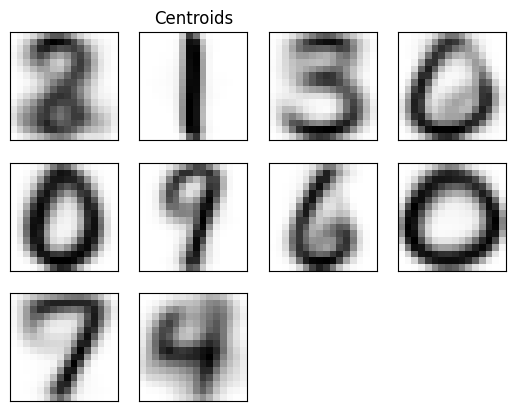

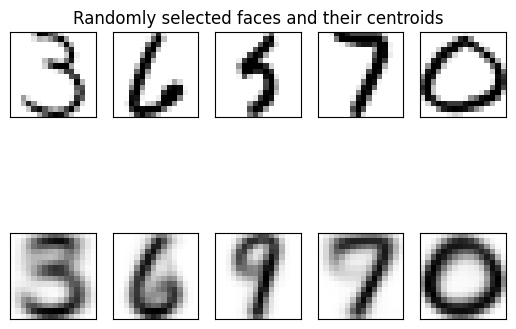

Ran Exercise 10.1.5


In [22]:
# exercise 10_1_5
import importlib_resources
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.cluster import k_means

filename = importlib_resources.files("dtuimldmtools").joinpath("data/digits.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)

#filename = importlib_resources.files("dtuimldmtools").joinpath("data/digits.mat") #<-- uncomment this for using the digits dataset 
#mat_data = loadmat('../Data/digits.mat') #<-- uncomment this for using the digits dataset 

X = mat_data['X']
N, M = X.shape
# Image resolution and number of colors
x = 16 #<-- change this for using the digits dataset
y = 16 #<-- change this for using the digits dataset
c = 1 #<-- change this for using the digits dataset


# Number of clusters:
K = 10

# Number of repetitions with different initial centroid seeds
S = 1

# Run k-means clustering:
centroids, cls, inertia = k_means(X, K, verbose=True, max_iter=100, n_init=S)


# Plot results:

# Plot centroids
plt.figure(1)
n1 = int(np.ceil(np.sqrt(K/2)))
n2 = int(np.ceil(float(K)/n1))

#For black and white, cmap=plt.cm.binary, else default
cmap = plt.cm.binary if c==1 else None 

for k in range(K):
    plt.subplot(n1,n2,k+1)
    # Reshape centroids to fit resolution and colors
    img = np.reshape(centroids[k,:],(c,x,y)).T
    if c == 1: # if color is single-color/gray scale
        # Squeeze out singleton dimension
        # and flip the image (cancel out previos transpose)
        img = np.squeeze(img).T
    plt.imshow(img,interpolation='None', cmap=cmap)
    plt.xticks([]); plt.yticks([])
    if k==np.floor((n2-1)/2): plt.title('Centroids')

# Plot few randomly selected faces and their nearest centroids    
L = 5       # number of images to plot
j = np.random.randint(0, N, L)
plt.figure(2)
for l in range(L):
    plt.subplot(2,L,l+1)
    img = np.resize(X[j[l],:],(c,x,y)).T
    if c == 1:
        img = np.squeeze(img).T
    plt.imshow(img,interpolation='None', cmap=cmap)
    plt.xticks([]); plt.yticks([])
    if l==np.floor((L-1)/2): plt.title('Randomly selected faces and their centroids')
    plt.subplot(2,L,L+l+1)
    img = np.resize(centroids[cls[j[l]],:],(c,x,y)).T
    if c == 1:
        img = np.squeeze(img).T
    plt.imshow(img,interpolation='None', cmap=cmap)
    plt.xticks([]); plt.yticks([])

plt.show()

print('Ran Exercise 10.1.5')


### Exercise 10.2: Hierarchical Clustering

**Objective**:  
In this exercise, we delve into **hierarchical clustering**, a method that organizes data points into a tree-like structure of nested clusters. This approach is particularly useful for visually exploring the relationships between data points across different levels of clustering.

**Key Concepts**:
- **Linkage Methods**: Different ways of measuring the distance between clusters, such as single, complete, and average linkage.
- **Dendrogram**: A tree-like diagram that illustrates the arrangement of clusters formed by hierarchical clustering.
- **Cluster Cutting**: Dividing the dendrogram into clusters at various levels to observe how data grouping changes.

This exercise will provide a deep understanding of how hierarchical clustering organizes data and how the choice of linkage method affects cluster structure.

---

### Exercise 10.2.1: Single Linkage Clustering and Dendrogram Visualization

**Objective**:  
In this task, we apply **single linkage hierarchical clustering** on a dataset to explore how closely related data points group together. 

**Steps**:
1. **Load the Data**: Import the synthetic dataset (`Data/synth1`).
2. **Single Linkage Clustering**: Perform hierarchical clustering using single linkage with Euclidean distance.
3. **Dendrogram and Scatter Plot**: Visualize the dendrogram to understand the cluster structure and plot a scatter plot showing the resulting clusters.

This task helps illustrate the concept of hierarchical clustering and the effect of single linkage on the shape and formation of clusters.

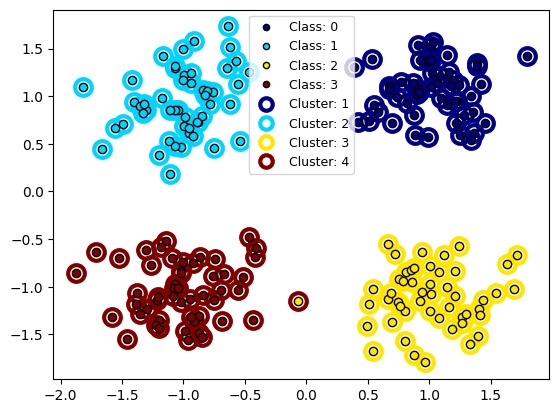

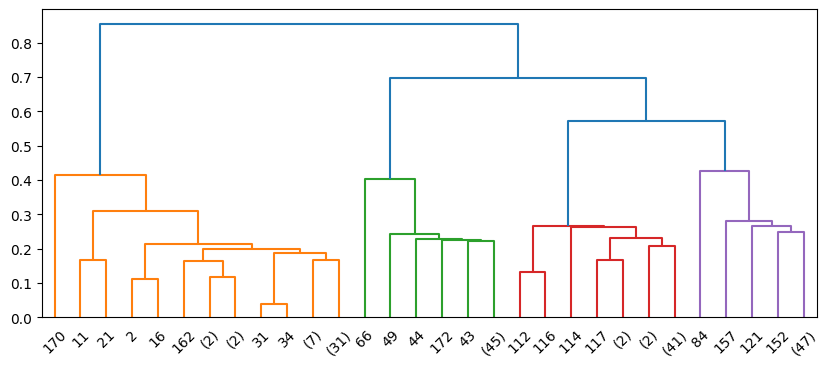

Ran Exercise 10.2.1


In [26]:
# exercise 10.2.1
import importlib_resources
from matplotlib.pyplot import figure, show
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from scipy.io import loadmat

from dtuimldmtools import clusterplot

filename = importlib_resources.files("dtuimldmtools").joinpath("data/synth1.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"].squeeze()]
classNames = [name[0][0] for name in mat_data["classNames"]]
N, M = X.shape
C = len(classNames)


# Perform hierarchical/agglomerative clustering on data matrix
Method = "single"
Metric = "euclidean"

Z = linkage(X, method=Method, metric=Metric)

# Compute and display clusters by thresholding the dendrogram
Maxclust = 4
cls = fcluster(Z, criterion="maxclust", t=Maxclust)
figure(1)
clusterplot(X, cls.reshape(cls.shape[0], 1), y=y)

# Display dendrogram
max_display_levels = 6
figure(2, figsize=(10, 4))
dendrogram(
    Z, truncate_mode="level", p=max_display_levels, color_threshold=Z[-Maxclust + 1, 2]
)

show()

print("Ran Exercise 10.2.1")


In [27]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

### Exercise 10.3: Clustering of Old Faithful Geyser Data

**Objective**:  
In this exercise, we apply clustering techniques to the **Old Faithful geyser dataset**, which contains two variables: eruption duration and waiting time between eruptions. Our goal is to identify natural clusters in the data and interpret the results, specifically exploring how different clustering methods and normalization affect the clusters.

**Tasks**:
- **10.3.1**: Apply **K-means clustering** to the Old Faithful data to examine the natural groupings and analyze the resulting clusters.
- **10.3.2**: Use **hierarchical clustering** with different linkage methods and compare the dendrogram structures to evaluate the fit for a two-cluster model.

This exercise will provide insights into clustering real-world data and the effects of normalization and method choice on clustering outcomes.

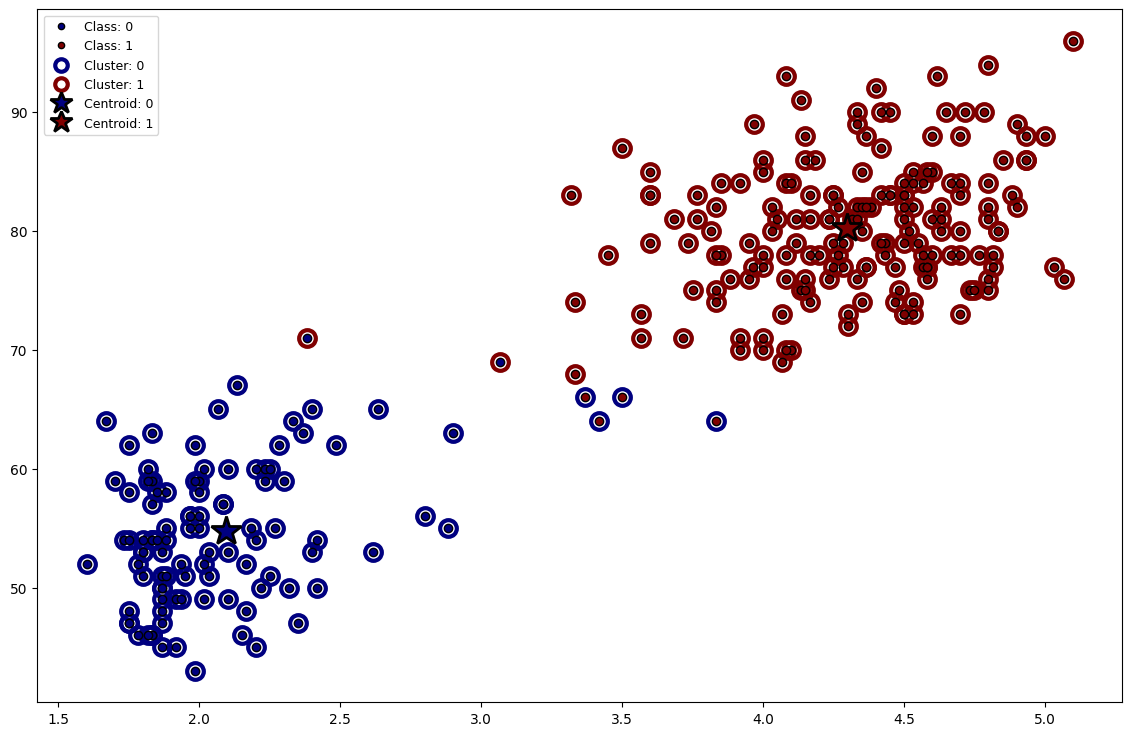

In [ ]:
import importlib_resources
from matplotlib.pyplot import figure, show
from scipy.io import loadmat
from sklearn.cluster import k_means

from dtuimldmtools import clusterplot

filename = importlib_resources.files("dtuimldmtools").joinpath("data/faithful.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"].squeeze()]
classNames = [name[0][0] for name in mat_data["classNames"]]
N, M = X.shape
C = len(classNames)

# Number of clusters:
K = 2

# K-means clustering:
centroids, cls, inertia = k_means(X, K)

# Plot results:
figure(figsize=(14, 9))
clusterplot(X, cls, centroids, y)
show()


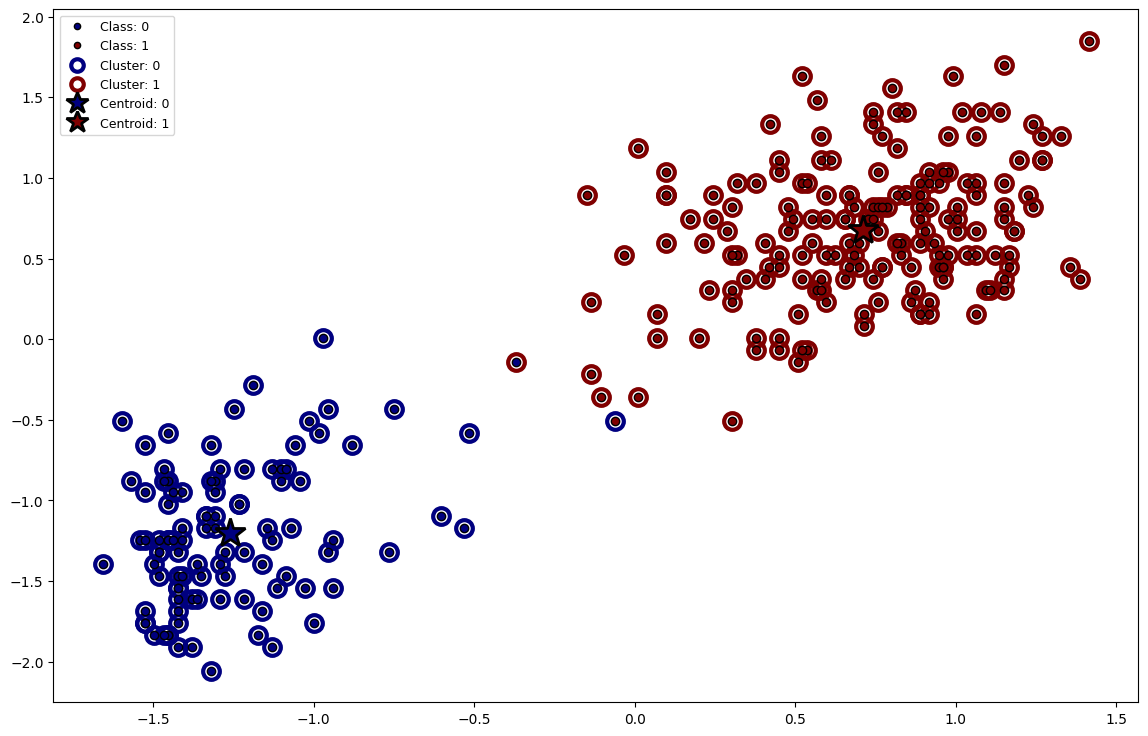

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


# Number of clusters
K = 2

# K-means clustering on normalized data
centroids, cls, inertia = k_means(X_normalized, K)

# Plot results
figure(figsize=(14, 9))
clusterplot(X_normalized, cls, centroids, y)
show()


slight improvement using normalization

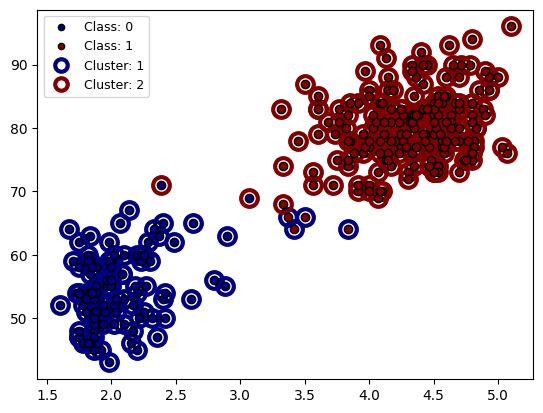

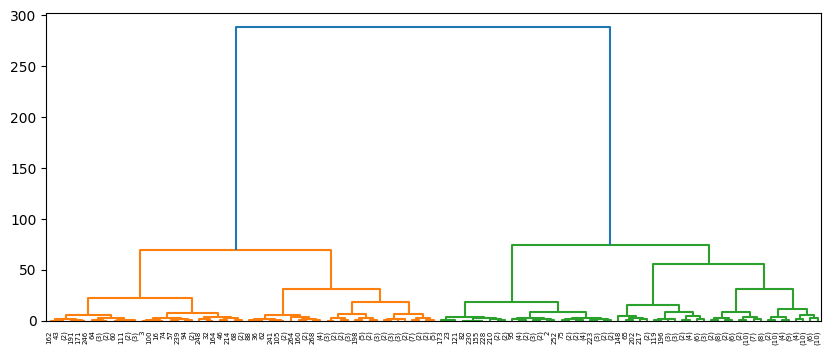

In [40]:
import importlib_resources
from matplotlib.pyplot import figure, show
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from scipy.io import loadmat

from dtuimldmtools import clusterplot

filename = importlib_resources.files("dtuimldmtools").joinpath("data/faithful.mat")

# Load Matlab data file and extract variables of interest
mat_data = loadmat(filename)
X = mat_data["X"]
y = mat_data["y"].squeeze()
attributeNames = [name[0] for name in mat_data["attributeNames"].squeeze()]
classNames = [name[0][0] for name in mat_data["classNames"]]
N, M = X.shape
C = len(classNames)


# Perform hierarchical/agglomerative clustering on data matrix
Method = "ward"
Metric = "euclidean"

Z = linkage(X, method=Method, metric=Metric)

# Compute and display clusters by thresholding the dendrogram
Maxclust = 2
cls = fcluster(Z, criterion="maxclust", t=Maxclust)
figure(1)
clusterplot(X, cls.reshape(cls.shape[0], 1), y=y)

# Display dendrogram
max_display_levels = 6
figure(2, figsize=(10, 4))
dendrogram(
    Z, truncate_mode="level", p=max_display_levels, color_threshold=Z[-Maxclust + 1, 2]
)

show()
